

# Project: Trend of gun purchases 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The aim of this project is to analyze the trend of gun purchases from the year 2010 to 2016. Two datasets have been provided by NCIS - one is U.S. Census data and the other one is gun data. Using these two datasets, going to analyze and conclude results based on the following questions:

Question 1: What are the top 5 states that tops the population having most hand guns for the year 2016?

Question 2: What are the top 5 states that tops the population having most long guns for the year 2016?

Question 3: What are the top 5 states that tops the population having most number of other types of guns for the year 2016?

Question 4: What is the overall trend? Whether gun purchase has increased or decreased during the period 2010-2016?

In [5]:
#importing packages
import numpy as np
import calendar
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, datasets are loaded and wrangled by renaming column names,trimming the size and shape of dataset.
### General Properties

In [9]:
#Reading the census data
df_census_data_old = pd.read_csv('U.S. Census Data.csv')
df_census_data_old

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,"Population estimates, July 1, 2016, (V2016)",NaN,"48,63,300","7,41,894","69,31,071","29,88,248","3,92,50,017","55,40,545","35,76,452","9,52,065",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Population estimates base, April 1, 2010, (V2...",NaN,"47,80,131","7,10,249","63,92,301","29,16,025","3,72,54,522","50,29,324","35,74,114","8,97,936",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Population, percent change - April 1, 2010 (es...",NaN,0.017,0.045,0.084,0.025,0.054,0.102,0.001,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.017,1.045,1.084,1.025,1.054,1.102,1.001,1.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Population, Census, April 1, 2010",NaN,"47,79,736","7,10,231","63,92,017","29,15,918","3,72,53,956","50,29,196","35,74,097","8,97,934",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Reading the gun data
df_gun_data = pd.read_csv('gun_data.csv')

In [11]:
#displaying values from the dataframe
df_census_data_old.head(1)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,"Population estimates, July 1, 2016, (V2016)",NaN,"48,63,300","7,41,894","69,31,071","29,88,248","3,92,50,017","55,40,545","35,76,452","9,52,065",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#dropping "Fact note" column from dataframes as it won't be used
df_census_data_old.drop(columns='Fact Note',inplace=True)

In [6]:
#Assigning only the first 4 rows as the remaining rows does not contain data relevant to the problem question
df_census_data_old = df_census_data_old.head(4)
df_census_data_old.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"


In [7]:
#Taking transpose of the dataframe and assigning it to a new dataframe as it will be easier to compare with Gun dataset.
df_census_data = df_census_data_old.transpose()

In [8]:
#Displaying values from new dataframe
df_census_data.head(2)

,0,1,2,3
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736"


In [9]:
#Assigning column names to the new dataframe
df_census_data.columns = ['est_2016' , 'est_base_2010' , 'percent_change' , 'population_2010']

In [10]:
#Removing "Fact" row from the dataframe 
df_census_data.drop(index='Fact',axis=0,inplace=True)

In [11]:
#Displaying the values after removing "Fact" row
df_census_data.head(2)

,est_2016,est_base_2010,percent_change,population_2010
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736"
Alaska,"741,894","710,249",4.50%,"710,231"


In [12]:
#Resetting index for census dataframe
df_census_data.reset_index(inplace=True)

In [13]:
#Renaming the column "index" with "state"
df_census_data.rename(columns={"index":"state"},inplace=True)

In [14]:
#Displaying the record after resetting and renaming the index
df_census_data.head()

,state,est_2016,est_base_2010,percent_change,population_2010
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736"
1,Alaska,"741,894","710,249",4.50%,"710,231"
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017"
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918"
4,California,"39,250,017","37,254,522",5.40%,"37,253,956"


In [15]:
#Displaying values from gun dataset
df_gun_data.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303


In [16]:
#converting month column to year type
pd.to_datetime(df_gun_data.month,yearfirst=True)

0       2017-09-01
1       2017-09-01
2       2017-09-01
3       2017-09-01
4       2017-09-01
5       2017-09-01
6       2017-09-01
7       2017-09-01
8       2017-09-01
9       2017-09-01
10      2017-09-01
11      2017-09-01
12      2017-09-01
13      2017-09-01
14      2017-09-01
15      2017-09-01
16      2017-09-01
17      2017-09-01
18      2017-09-01
19      2017-09-01
20      2017-09-01
21      2017-09-01
22      2017-09-01
23      2017-09-01
24      2017-09-01
25      2017-09-01
26      2017-09-01
27      2017-09-01
28      2017-09-01
29      2017-09-01
           ...    
12455   1998-11-01
12456   1998-11-01
12457   1998-11-01
12458   1998-11-01
12459   1998-11-01
12460   1998-11-01
12461   1998-11-01
12462   1998-11-01
12463   1998-11-01
12464   1998-11-01
12465   1998-11-01
12466   1998-11-01
12467   1998-11-01
12468   1998-11-01
12469   1998-11-01
12470   1998-11-01
12471   1998-11-01
12472   1998-11-01
12473   1998-11-01
12474   1998-11-01
12475   1998-11-01
12476   1998

In [17]:
#Separatimg year from yyyy-mm-dd format
year_data = pd.DatetimeIndex(df_gun_data['month']).year
year_data

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998],
           dtype='int64', name='month', length=12485)

In [18]:
#Creating a new column "year" and inserting it in the gun dataframe
df_gun_data.insert(loc=1,column='year',value=year_data)

In [19]:
#Displaying the gun dataframe after inserting 'year' column
df_gun_data.head(2)

,month,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,2017,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,2017,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303


In [20]:
#Since many rows in gun dataframe contains empty values, 0 is filled
df_gun_data.fillna(0,inplace=True)
df_gun_data.head(2)

,month,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,2017,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,2017,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303


In [21]:
#Creating a single record for a state and a year by summing up months and creating a single record for a year 
df_gun_data = df_gun_data.groupby(['year','state']).sum() 

In [22]:
#Resetting index for gun dataframe
df_gun_data.reset_index(inplace=True)
df_gun_data.head()

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,1998,Alabama,0.0,0.0,10567.0,25723.0,0.0,278,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36568
1,1998,Alaska,4.0,0.0,1365.0,2555.0,0.0,61,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3985
2,1998,Arizona,1733.0,0.0,7157.0,8275.0,0.0,278,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17453
3,1998,Arkansas,0.0,0.0,4649.0,16914.0,0.0,189,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21752
4,1998,California,5366.0,0.0,28641.0,33438.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67445


# Data Cleaning


# Checking Missing values

In [25]:
#Checking for empty values in census dataframe
df_census_data.isna().any()

state              False
est_2016           False
est_base_2010      False
percent_change     False
population_2010    False
dtype: bool

In [26]:
#Checking for empty values in gun dataframe
df_gun_data.isna().any()

year                         False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

# Checking duplicate values

In [27]:
#Check whether census dataframe has duplicate values
df_census_data.duplicated().sum()

0

In [28]:
#Check whether gun dataframe has duplicate values
df_gun_data.duplicated().sum()

0

# Checking datatypes

In [29]:
#Checking the datatypes
df_census_data.dtypes

state              object
est_2016           object
est_base_2010      object
percent_change     object
population_2010    object
dtype: object

In [30]:
#Checking datatype in gun dataframe
df_gun_data.dtypes

year                           int64
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

Since percent change is of type 'object', it has to be converted to float and population of year 2010 and 2016 has to be converted to int

In [31]:
#To convert percent_change to int values, removing % sign from the column data
df_census_data['percent_change'] = df_census_data['percent_change'].str.replace("%","")

In [32]:
#Displaying the percent_change column after removing % sign
df_census_data.percent_change

0      1.70
1      4.50
2      8.40
3      2.50
4      5.40
5     10.20
6      0.10
7      6.00
8      9.60
9      6.40
10     5.00
11     7.40
12    -0.20
13     2.30
14     2.90
15     1.90
16     2.20
17     3.30
18     0.20
19     4.20
20     4.00
21     0.40
22     4.10
23     0.70
24     1.70
25     5.40
26     4.40
27     8.90
28     1.40
29     1.70
30    0.011
31    0.019
32    0.064
33    0.127
34    0.007
35    0.046
36    0.068
37    0.006
38    0.003
39    0.073
40    0.063
41    0.048
42    10.80
43    10.40
44    -0.20
45     5.10
46     8.40
47    -1.20
48     1.60
49     3.90
Name: percent_change, dtype: object

In [33]:
#Converting percent to float
df_census_data['percent_change']=pd.to_numeric(df_census_data['percent_change'])
df_census_data.percent_change

0      1.700
1      4.500
2      8.400
3      2.500
4      5.400
5     10.200
6      0.100
7      6.000
8      9.600
9      6.400
10     5.000
11     7.400
12    -0.200
13     2.300
14     2.900
15     1.900
16     2.200
17     3.300
18     0.200
19     4.200
20     4.000
21     0.400
22     4.100
23     0.700
24     1.700
25     5.400
26     4.400
27     8.900
28     1.400
29     1.700
30     0.011
31     0.019
32     0.064
33     0.127
34     0.007
35     0.046
36     0.068
37     0.006
38     0.003
39     0.073
40     0.063
41     0.048
42    10.800
43    10.400
44    -0.200
45     5.100
46     8.400
47    -1.200
48     1.600
49     3.900
Name: percent_change, dtype: float64

In [34]:
#Checking the datatype after converting percent_change field
df_census_data.dtypes

state               object
est_2016            object
est_base_2010       object
percent_change     float64
population_2010     object
dtype: object

In [35]:
#In order to convert estimate base 2010 field to int, "," is removed
df_census_data['est_base_2010'] = df_census_data['est_base_2010'].str.replace(",","")


In [36]:
#In order to convert estimate 2016 and population 2010 field to int, "," is removed
df_census_data['est_2016'] = df_census_data['est_2016'].str.replace(",","")
df_census_data['population_2010'] = df_census_data['population_2010'].str.replace(",","")

In [37]:
#Converting estimate base 2010 to int
df_census_data['est_base_2010'] = df_census_data['est_base_2010'].astype(int)

In [38]:
#Converting estimates 2016 and population 2010 to int
df_census_data['est_2016'] = df_census_data['est_2016'].astype(int)
df_census_data['population_2010'] = df_census_data['population_2010'].astype(int)

In [39]:
#Checking the datatypes of census data after datatype conversion of all the columns
df_census_data.dtypes

state               object
est_2016             int64
est_base_2010        int64
percent_change     float64
population_2010      int64
dtype: object

# Calculation of population for the year 2016

In [40]:
#Assigning estimate base 2010 column to "est_2010" 
est_2010 = df_census_data.est_base_2010

In [41]:
#To generate population for the year 2016, formula is applied - formula(percent * estimate base 2010 )
value_2016 = df_census_data['percent_change'].apply(lambda x:((x/100)+1))
value_2016 = value_2016 * df_census_data['est_base_2010']

In [42]:
#Converting the calculated value to int
value_2016 = value_2016.astype(int)

In [43]:
#Creating a new column in census data and assigning "value_2016" to it so that population 2016 value can be obtained
df_census_data['population_2016']=value_2016

In [44]:
#Displaying census data after inserting "Population 2016"
df_census_data.head()

,state,est_2016,est_base_2010,percent_change,population_2010,population_2016
0,Alabama,4863300,4780131,1.7,4779736,4861393
1,Alaska,741894,710249,4.5,710231,742210
2,Arizona,6931071,6392301,8.4,6392017,6929254
3,Arkansas,2988248,2916025,2.5,2915918,2988925
4,California,39250017,37254522,5.4,37253956,39266266


# Creating two new dataframes for the year 2010 and 2016 so that results can be clear conclusion can be made.

In [45]:
#Creating a new dataframe for the year 2016
gun_data_16 = df_gun_data[df_gun_data['year']==2016]
gun_data_16.head()

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
990,2016,Alabama,291039.0,0.0,153123.0,121963.0,6104.0,6545,5.0,111.0,...,0.0,0.0,0.0,72.0,65.0,4.0,3.0,2.0,0.0,616947
991,2016,Alaska,3121.0,0.0,37491.0,36887.0,2889.0,2316,0.0,84.0,...,0.0,0.0,0.0,39.0,66.0,1.0,2.0,3.0,0.0,87647
992,2016,Arizona,87771.0,5109.0,166784.0,108988.0,13122.0,7908,0.0,74.0,...,1.0,0.0,0.0,76.0,56.0,11.0,11.0,11.0,1.0,416279
993,2016,Arkansas,55456.0,7036.0,80244.0,82120.0,3059.0,4400,143.0,77.0,...,0.0,0.0,0.0,72.0,64.0,6.0,7.0,4.0,1.0,266014
994,2016,California,1036981.0,0.0,560355.0,554550.0,211707.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377167


In [46]:
#Resetting index for the new dataframe for the year 2016
gun_data_16.reset_index(inplace=True)

In [47]:
#Displaying the dataframe after resetting index
gun_data_16.head()

,index,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,990,2016,Alabama,291039.0,0.0,153123.0,121963.0,6104.0,6545,5.0,...,0.0,0.0,0.0,72.0,65.0,4.0,3.0,2.0,0.0,616947
1,991,2016,Alaska,3121.0,0.0,37491.0,36887.0,2889.0,2316,0.0,...,0.0,0.0,0.0,39.0,66.0,1.0,2.0,3.0,0.0,87647
2,992,2016,Arizona,87771.0,5109.0,166784.0,108988.0,13122.0,7908,0.0,...,1.0,0.0,0.0,76.0,56.0,11.0,11.0,11.0,1.0,416279
3,993,2016,Arkansas,55456.0,7036.0,80244.0,82120.0,3059.0,4400,143.0,...,0.0,0.0,0.0,72.0,64.0,6.0,7.0,4.0,1.0,266014
4,994,2016,California,1036981.0,0.0,560355.0,554550.0,211707.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377167


In [48]:
#Since "index" becomes a column, it is dropped
gun_data_16=gun_data_16.drop('index',axis=1)

In [49]:
#Gun dataframe for the year 2016
gun_data_16.head()

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2016,Alabama,291039.0,0.0,153123.0,121963.0,6104.0,6545,5.0,111.0,...,0.0,0.0,0.0,72.0,65.0,4.0,3.0,2.0,0.0,616947
1,2016,Alaska,3121.0,0.0,37491.0,36887.0,2889.0,2316,0.0,84.0,...,0.0,0.0,0.0,39.0,66.0,1.0,2.0,3.0,0.0,87647
2,2016,Arizona,87771.0,5109.0,166784.0,108988.0,13122.0,7908,0.0,74.0,...,1.0,0.0,0.0,76.0,56.0,11.0,11.0,11.0,1.0,416279
3,2016,Arkansas,55456.0,7036.0,80244.0,82120.0,3059.0,4400,143.0,77.0,...,0.0,0.0,0.0,72.0,64.0,6.0,7.0,4.0,1.0,266014
4,2016,California,1036981.0,0.0,560355.0,554550.0,211707.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377167


In [50]:
#Creating dataframe for the year 2010
gun_data_10 = df_gun_data.query('year == 2010')
gun_data_10.head(1)

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
660,2010,Alabama,4621.0,0.0,116963.0,136519.0,1771.0,5465,19.0,115.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308607


In [51]:
#Resetting index in the dataframe for the year 2010
gun_data_10.reset_index(inplace=True)

In [52]:
#Displaying the 2010 dataframe after resetting index
gun_data_10.head(1)

,index,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,660,2010,Alabama,4621.0,0.0,116963.0,136519.0,1771.0,5465,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308607


In [53]:
#Dropping the "index" column as index is created as a separate column after resetting index
gun_data_10 = gun_data_10.drop('index',axis=1)

In [54]:
#displaying the 2010 dataframe
gun_data_10.head()

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2010,Alabama,4621.0,0.0,116963.0,136519.0,1771.0,5465,19.0,115.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308607
1,2010,Alaska,0.0,0.0,25720.0,33177.0,825.0,1519,0.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65909
2,2010,Arizona,24751.0,0.0,89162.0,69067.0,2091.0,3768,0.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206050
3,2010,Arkansas,31305.0,0.0,49992.0,72206.0,636.0,3145,64.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191448
4,2010,California,295252.0,0.0,245159.0,275458.0,0.0,0,530.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,816399


# <a id='eda'></a>
## Exploratory Data Analysis

Question 1: What are the top 5 states that tops the population having most hand guns for the year 2016? 

In [55]:
#displaying the census dataframe
df_census_data

,state,est_2016,est_base_2010,percent_change,population_2010,population_2016
0,Alabama,4863300,4780131,1.700,4779736,4861393
1,Alaska,741894,710249,4.500,710231,742210
2,Arizona,6931071,6392301,8.400,6392017,6929254
3,Arkansas,2988248,2916025,2.500,2915918,2988925
4,California,39250017,37254522,5.400,37253956,39266266
5,Colorado,5540545,5029324,10.200,5029196,5542315
6,Connecticut,3576452,3574114,0.100,3574097,3577688
7,Delaware,952065,897936,6.000,897934,951812
8,Florida,20612439,18804592,9.600,18801310,20609832
9,Georgia,10310371,9688680,6.400,9687653,10308755


In [56]:
#displaying gun dataframe for the year 2016
gun_data_16

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2016,Alabama,291039.0,0.0,153123.0,121963.0,6104.0,6545,5.0,111.0,...,0.0,0.0,0.0,72.0,65.0,4.0,3.0,2.0,0.0,616947
1,2016,Alaska,3121.0,0.0,37491.0,36887.0,2889.0,2316,0.0,84.0,...,0.0,0.0,0.0,39.0,66.0,1.0,2.0,3.0,0.0,87647
2,2016,Arizona,87771.0,5109.0,166784.0,108988.0,13122.0,7908,0.0,74.0,...,1.0,0.0,0.0,76.0,56.0,11.0,11.0,11.0,1.0,416279
3,2016,Arkansas,55456.0,7036.0,80244.0,82120.0,3059.0,4400,143.0,77.0,...,0.0,0.0,0.0,72.0,64.0,6.0,7.0,4.0,1.0,266014
4,2016,California,1036981.0,0.0,560355.0,554550.0,211707.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377167
5,2016,Colorado,85087.0,0.0,242502.0,180026.0,15890.0,14293,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540514
6,2016,Connecticut,148949.0,0.0,122375.0,43813.0,2445.0,0,108.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,317692
7,2016,Delaware,8440.0,0.0,25574.0,21746.0,1268.0,1034,0.0,22.0,...,0.0,0.0,0.0,590.0,195.0,32.0,12.0,3.0,0.0,59430
8,2016,District of Columbia,144.0,0.0,675.0,48.0,0.0,8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,875
9,2016,Florida,337086.0,0.0,662308.0,316232.0,42439.0,25142,264.0,170.0,...,13.0,0.0,0.0,369.0,143.0,4.0,2.0,0.0,0.0,1435340


In [57]:
#joining two dataframes based on index so that related fields can be manipulated and used for analysis
gun_data_16 = gun_data_16.join(df_census_data.set_index('state'), on='state')

In [58]:
#dropping records with mising values
gun_data_16.dropna(axis=0,inplace=True)

In [59]:
#Checking the number of columns in the dataframe for the year 2016 after appending
gun_data_16.shape

(50, 32)

In [60]:
gun_data_16.head(1)

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,est_2016,est_base_2010,percent_change,population_2010,population_2016
0,2016,Alabama,291039.0,0.0,153123.0,121963.0,6104.0,6545,5.0,111.0,...,4.0,3.0,2.0,0.0,616947,4863300.0,4780131.0,1.7,4779736.0,4861393.0


In order to calculate population having hand gun per 100k, following formula is used: (population having handgun/total population)*100k

In [61]:
#multiplying population having handgun with 100k 
val = gun_data_16['handgun'].apply(lambda x: (x*100000))

In [62]:
#Dividing the "val" calculated above, with population 2016 to calculate population having hundgun per 100k
val = val / gun_data_16['population_2016']

In [63]:
#Displaying the calculated value
val.head()

0    3149.776206
1    5051.265814
2    2406.954630
3    2684.711058
4    1427.064646
dtype: float64

In [64]:
#Creating a new column to store handgun population per 100k
gun_data_16['handgun_per100k']=''

In [65]:
#Assigning value to the handgun per 100k column in the dataframe
gun_data_16['handgun_per100k']=val
gun_data_16.columns

Index(['year', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals', 'est_2016', 'est_base_2010',
       'percent_change', 'population_2010', 'population_2016',
       'handgun_per100k'],
      dtype='object')

In [66]:
#"col_id" to pass to the bar graph to mark the x-axis
col_id=[1,2,3,4,5]

In [67]:
#Retrieving top 5 largest values from "handgun_per100k"
plot_handgun = gun_data_16.nlargest(5,'handgun_per100k')
plot_handgun = plot_handgun.sort_values(by='handgun_per100k')
plot_handgun

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,est_2016,est_base_2010,percent_change,population_2010,population_2016,handgun_per100k
45,2016,Tennessee,106082.0,62697.0,319169.0,210161.0,5011.0,11092,3.0,0.0,...,0.0,0.0,0.0,714774,6651194.0,6346298.0,0.048,6346105.0,6349344.0,5026.802769
52,2016,West Virginia,26806.0,0.0,92124.0,81105.0,3643.0,5283,73.0,77.0,...,7.0,7.0,0.0,242350,1831102.0,1853011.0,-1.200,1852994.0,1830774.0,5031.970085
1,2016,Alaska,3121.0,0.0,37491.0,36887.0,2889.0,2316,0.0,84.0,...,2.0,3.0,0.0,87647,741894.0,710249.0,4.500,710231.0,742210.0,5051.265814
40,2016,Pennsylvania,333755.0,0.0,642232.0,158141.0,249.0,0,1704.0,0.0,...,0.0,0.0,0.0,1143220,12784227.0,12702857.0,0.006,12702379.0,12703619.0,5055.504262
31,2016,New Hampshire,48347.0,0.0,68529.0,44681.0,2206.0,55,205.0,0.0,...,0.0,4.0,2.0,165164,1334795.0,1316461.0,1.400,1316470.0,1334891.0,5133.677581


In [68]:
#Creating a variable that stores handgun per 100k data to pass to the bar graph
plot_handgun_data=plot_handgun['handgun_per100k']

In [69]:
#Displaying top 5 values
plot_handgun_data

45    5026.802769
52    5031.970085
1     5051.265814
40    5055.504262
31    5133.677581
Name: handgun_per100k, dtype: float64

In [70]:
#Storing top 5 states that has highest hand gun 
label_id = plot_handgun['state']
label_id

45        Tennessee
52    West Virginia
1            Alaska
40     Pennsylvania
31    New Hampshire
Name: state, dtype: object

In [71]:
#Displaying the dataframe that has top 5 states
plot_handgun

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,est_2016,est_base_2010,percent_change,population_2010,population_2016,handgun_per100k
45,2016,Tennessee,106082.0,62697.0,319169.0,210161.0,5011.0,11092,3.0,0.0,...,0.0,0.0,0.0,714774,6651194.0,6346298.0,0.048,6346105.0,6349344.0,5026.802769
52,2016,West Virginia,26806.0,0.0,92124.0,81105.0,3643.0,5283,73.0,77.0,...,7.0,7.0,0.0,242350,1831102.0,1853011.0,-1.200,1852994.0,1830774.0,5031.970085
1,2016,Alaska,3121.0,0.0,37491.0,36887.0,2889.0,2316,0.0,84.0,...,2.0,3.0,0.0,87647,741894.0,710249.0,4.500,710231.0,742210.0,5051.265814
40,2016,Pennsylvania,333755.0,0.0,642232.0,158141.0,249.0,0,1704.0,0.0,...,0.0,0.0,0.0,1143220,12784227.0,12702857.0,0.006,12702379.0,12703619.0,5055.504262
31,2016,New Hampshire,48347.0,0.0,68529.0,44681.0,2206.0,55,205.0,0.0,...,0.0,4.0,2.0,165164,1334795.0,1316461.0,1.400,1316470.0,1334891.0,5133.677581


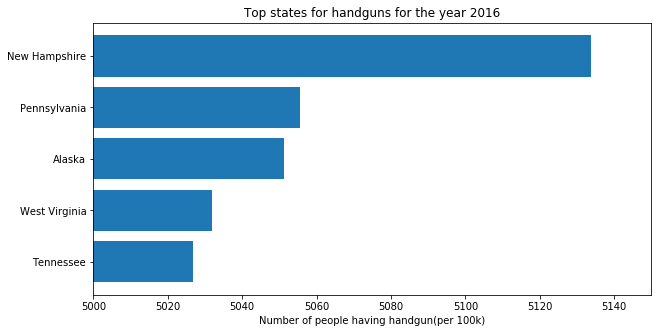

In [72]:
#Visualizing top 5 states that has highest population having hang gun
plt.figure(figsize=(10,5))
plt.barh([1,2,3,4,5],plot_handgun_data,tick_label=label_id)
plt.xlabel('Number of people having handgun(per 100k)')
plt.title('Top states for handguns for the year 2016')
plt.xlim(5000,5150)
plt.savefig('Handgun_2016.png',dpi=100)

In [185]:
#Displaying mean and standard deviation for all the years from 1998-2017 for top 5 states that uses hand guns
df = df_gun_data.groupby('state')['handgun'].sum()
df=df.sort_values(ascending=False)[0:5]
df_new=df_gun_data[df_gun_data['state'].isin(df.index.values.tolist())]
df_new.groupby('state')['totals'].describe().loc[:,['mean','std']]

,mean,std
state,,
California,950703.15,500715.627546
Florida,584788.85,368729.883507
Ohio,423137.20,198947.509571
Tennessee,365564.65,181674.612931
Texas,971759.30,417277.366171


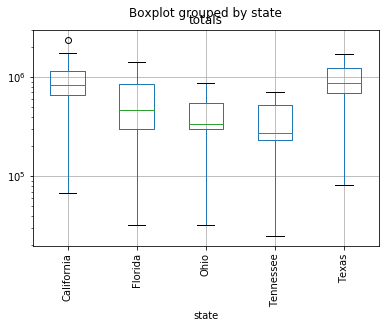

In [186]:
#Box plot to show overall mean and standard deviation for hand gun for all the years
df_total = df_new[df_new.totals > 0]
df_total.boxplot(column='totals',by='state',rot=90).set_yscale('log')

Question 2: What are the top 5 states that tops the population having most long guns for the year 2016?

In [73]:
#multiplying population having long gun with 100k
long_gun_16 = gun_data_16['long_gun'].apply(lambda x:x*100000) 

In [74]:
#Dividing the "long_gun_16" calculated above, with population 2016 to calculate population 
long_gun_16 = long_gun_16/gun_data_16['population_2016']

In [75]:
#Creating a new column to store handgun population per 100k
gun_data_16['long_gun_per100k']=''

In [76]:
#Assigning value to the handgun per 100k column in the dataframe
gun_data_16['long_gun_per100k']=long_gun_16

In [77]:
#Displaying top 5 records from "long_gun_per100k"
gun_data_16['long_gun_per100k'].head()

0    2508.807661
1    4969.887229
2    1572.867729
3    2747.476099
4    1412.280964
Name: long_gun_per100k, dtype: float64

In [78]:
#Retrieve top 5 values from gun_data_16 dataframe and sort it in descending order and pass it to bar graph
long_gun_16 = gun_data_16.nlargest(5,['long_gun_per100k'])
long_gun_16 = long_gun_16.sort_values(by='long_gun_per100k',ascending=False)
long_gun_data = long_gun_16['long_gun_per100k']
long_gun_16

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,return_to_seller_long_gun,return_to_seller_other,totals,est_2016,est_base_2010,percent_change,population_2010,population_2016,handgun_per100k,long_gun_per100k
44,2016,South Dakota,16279.0,0.0,36520.0,49522.0,3134.0,2184,8.0,12.0,...,2.0,0.0,111921,865454.0,814195.0,0.063,814180.0,814707.0,4482.593129,6078.504297
28,2016,Montana,20512.0,0.0,37547.0,56834.0,2142.0,2678,221.0,34.0,...,17.0,0.0,136337,1042520.0,989414.0,5.400,989415.0,1042842.0,3600.449541,5449.914752
36,2016,North Dakota,13240.0,0.0,19975.0,34013.0,1284.0,972,0.0,10.0,...,0.0,1.0,72036,757952.0,672591.0,0.127,672591.0,673445.0,2966.092257,5050.598044
1,2016,Alaska,3121.0,0.0,37491.0,36887.0,2889.0,2316,0.0,84.0,...,3.0,0.0,87647,741894.0,710249.0,4.500,710231.0,742210.0,5051.265814,4969.887229
52,2016,West Virginia,26806.0,0.0,92124.0,81105.0,3643.0,5283,73.0,77.0,...,7.0,0.0,242350,1831102.0,1853011.0,-1.200,1852994.0,1830774.0,5031.970085,4430.093501


In [79]:
#Storing top 5 states that has highest hand gun 
long_gun_plot_label=long_gun_16.state
long_gun_plot_label

44     South Dakota
28          Montana
36     North Dakota
1            Alaska
52    West Virginia
Name: state, dtype: object

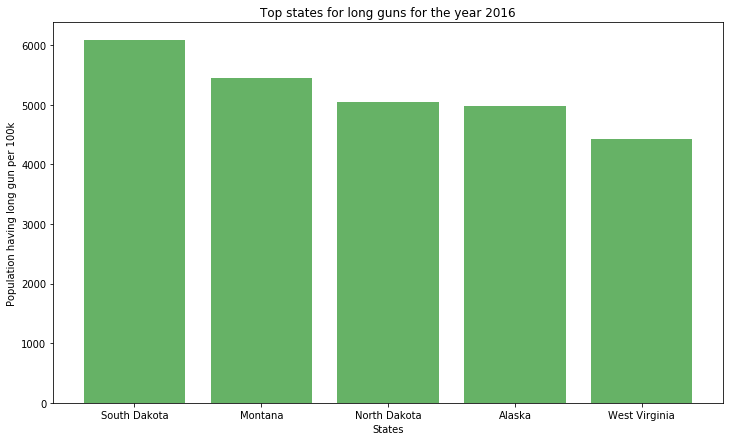

In [80]:
#Visualizing top 5 states that has highest population having long gun
plt.figure(figsize=(12,7))
plt.bar([1,2,3,4,5],long_gun_data,tick_label=long_gun_plot_label,color='green',alpha=0.6)
plt.title('Top states for long guns for the year 2016')
plt.xlabel('States')
plt.ylabel('Population having long gun per 100k')
plt.savefig('Long_gun_2016.png',dpi=200)

In [161]:
#Displaying mean and standard deviation for all the years from 1998-2017 for top 5 states that uses long guns
df = df_gun_data.groupby('state')['long_gun'].sum()
df=df.sort_values(ascending=False)[0:5]
df_new=df_gun_data[df_gun_data['state'].isin(df.index.values.tolist())]
df_new.groupby('state')['totals'].describe().loc[:,['mean','std']]

,mean,std
state,,
California,950703.15,500715.627546
Florida,584788.85,368729.883507
Ohio,423137.20,198947.509571
Pennsylvania,656693.80,253461.193204
Texas,971759.30,417277.366171


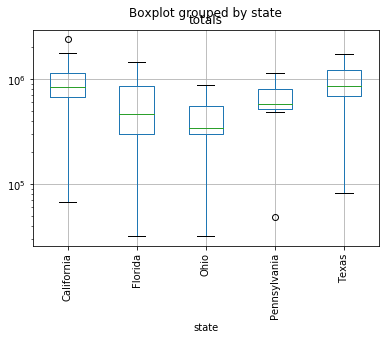

In [162]:
#Box plot to show overall mean and standard deviation for long gun for all the years
df_total = df_new[df_new.totals > 0]
df_total.boxplot(column='totals',by='state',rot=90).set_yscale('log')

Question 3: What are the top 5 states that tops the population having other type of guns for the year 2016?

In [81]:
#multiplying population having other gun with 100k
other_gun = gun_data_16['other'].apply(lambda x:x*100000)

In [82]:
#Dividing the "val" calculated above, with population 2016 to calculate population having other gun per 100k
other_gun = other_gun / gun_data_16['population_2016']

In [83]:
#Creating a new column to store other gun population per 100k
gun_data_16['other_gun_per100k'] = ''

In [84]:
#Assigning value to the other gun per 100k column in the dataframe
gun_data_16['other_gun_per100k'] = other_gun

In [85]:
#Retrieving top 5 largest values from "other_gun_per100k" and sort them
other_gun_plot = gun_data_16.nlargest(5,['other_gun_per100k'])
other_gun_plot = other_gun_plot.sort_values(by='other_gun_per100k')
other_gun_plot

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,return_to_seller_other,totals,est_2016,est_base_2010,percent_change,population_2010,population_2016,handgun_per100k,long_gun_per100k,other_gun_per100k
51,2016,Washington,268274.0,652.0,214106.0,151029.0,23732.0,8028,39.0,78.0,...,14.0,713996,7288000.0,6724545.0,8.400,6724540.0,7289406.0,2937.221497,2071.897216,325.568366
38,2016,Oklahoma,0.0,0.0,166181.0,130514.0,13098.0,10661,0.0,140.0,...,4.0,364590,3923561.0,3751615.0,0.046,3751351.0,3753340.0,4427.549862,3477.276239,348.969185
44,2016,South Dakota,16279.0,0.0,36520.0,49522.0,3134.0,2184,8.0,12.0,...,0.0,111921,865454.0,814195.0,0.063,814180.0,814707.0,4482.593129,6078.504297,384.678173
1,2016,Alaska,3121.0,0.0,37491.0,36887.0,2889.0,2316,0.0,84.0,...,0.0,87647,741894.0,710249.0,4.500,710231.0,742210.0,5051.265814,4969.887229,389.242937
4,2016,California,1036981.0,0.0,560355.0,554550.0,211707.0,0,0.0,0.0,...,0.0,2377167,39250017.0,37254522.0,5.400,37253956.0,39266266.0,1427.064646,1412.280964,539.157454


In [187]:
#Creating a variable that stores other gun per 100k data to pass to the bar graph
other_gun_plot_data = other_gun_plot.other_gun_per100k
other_gun_plot_data

51    325.568366
38    348.969185
44    384.678173
1     389.242937
4     539.157454
Name: other_gun_per100k, dtype: float64

In [188]:
#Storing top 5 states that has highest hand gun 
other_gun_plot_label = other_gun_plot.state
other_gun_plot_label

51      Washington
38        Oklahoma
44    South Dakota
1           Alaska
4       California
Name: state, dtype: object

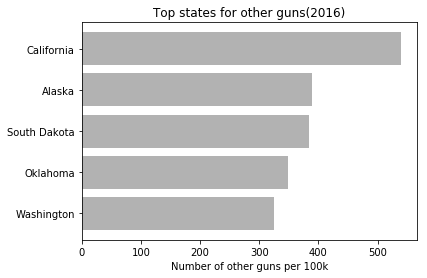

In [189]:
#Visualizing top 5 states that has highest population having hang gun
plt.barh([1,2,3,4,5],other_gun_plot_data,tick_label=other_gun_plot_label,color='black',alpha=0.3)
plt.title('Top states for other guns(2016)')
plt.xlabel('Number of other guns per 100k')
plt.savefig('Other_guns_2016.png',dpi=200)

In [190]:
#Displaying mean and standard deviation for all the years from 1998-2017 for top 5 states that uses other guns
df = df_gun_data.groupby('state')['other'].sum()
df=df.sort_values(ascending=False)[0:5]
df_new=df_gun_data[df_gun_data['state'].isin(df.index.values.tolist())]
df_new.groupby('state')['totals'].describe().loc[:,['mean','std']]

,mean,std
state,,
California,950703.15,500715.627546
Florida,584788.85,368729.883507
Ohio,423137.20,198947.509571
Texas,971759.30,417277.366171
Washington,319225.85,173933.957979


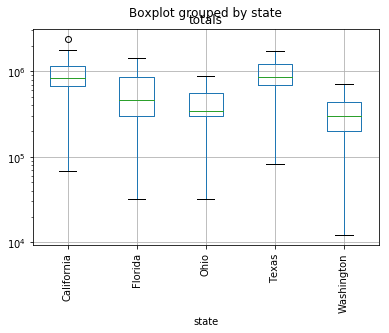

In [191]:
#Box plot to show overall mean and standard deviation for long gun for all the years
df_total = df_new[df_new.totals > 0]
df_total.boxplot(column='totals',by='state',rot=90).set_yscale('log')

Question 4: What is the overall trend? Whether gun purchase has increased or decreased during the period 2010-2016?

In [192]:
#Joining 2010 dataframe with census dataframe
gun_data_10 = gun_data_10.join(df_census_data.set_index('state'),on='state')

In [193]:
#dropping record with missing values
gun_data_10.dropna(inplace=True)

In [194]:
#Resetting index after appending the dataframes
gun_data_10.reset_index(inplace=True)
gun_data_10.head()

,index,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,est_2016,est_base_2010,percent_change,population_2010,population_2016
0,0,2010,Alabama,4621.0,0.0,116963.0,136519.0,1771.0,5465,19.0,...,0.0,0.0,0.0,0.0,308607,4863300.0,4780131.0,1.7,4779736.0,4861393.0
1,1,2010,Alaska,0.0,0.0,25720.0,33177.0,825.0,1519,0.0,...,0.0,0.0,0.0,0.0,65909,741894.0,710249.0,4.5,710231.0,742210.0
2,2,2010,Arizona,24751.0,0.0,89162.0,69067.0,2091.0,3768,0.0,...,0.0,0.0,0.0,0.0,206050,6931071.0,6392301.0,8.4,6392017.0,6929254.0
3,3,2010,Arkansas,31305.0,0.0,49992.0,72206.0,636.0,3145,64.0,...,0.0,0.0,0.0,0.0,191448,2988248.0,2916025.0,2.5,2915918.0,2988925.0
4,4,2010,California,295252.0,0.0,245159.0,275458.0,0.0,0,530.0,...,0.0,0.0,0.0,0.0,816399,39250017.0,37254522.0,5.4,37253956.0,39266266.0


In [197]:
#Dropping unnecessary columns after resetting the index
gun_data_10.drop(columns='index',axis=1,inplace=True)

In [198]:
#multiplying population having handgun with 100k
handgun_data_10_per100k = gun_data_10['handgun'].apply(lambda x:x*100000) 

In [199]:
#Dividing the "val" calculated above, with population 2010 to calculate population having hundgun per 100k
handgun_data_10_per100k = handgun_data_10_per100k / gun_data_10['population_2010']

In [200]:
#Creating a new column to store handgun population per 100k
gun_data_10['handgun_data_10_per100k'] = ''

In [201]:
#Assigning value to the handgun per 100k column in the dataframe
gun_data_10['handgun_data_10_per100k'] = handgun_data_10_per100k
gun_data_10.head(1)

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,est_2016,est_base_2010,percent_change,population_2010,population_2016,handgun_data_10_per100k
0,2010,Alabama,4621.0,0.0,116963.0,136519.0,1771.0,5465,19.0,115.0,...,0.0,0.0,0.0,308607,4863300.0,4780131.0,1.7,4779736.0,4861393.0,2447.059838


In [202]:
#Dropping missing values after joining the dataframe
gun_data_10.dropna(inplace=True)

In [203]:
gun_data_10.head()

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,est_2016,est_base_2010,percent_change,population_2010,population_2016,handgun_data_10_per100k
0,2010,Alabama,4621.0,0.0,116963.0,136519.0,1771.0,5465,19.0,115.0,...,0.0,0.0,0.0,308607,4863300.0,4780131.0,1.7,4779736.0,4861393.0,2447.059838
1,2010,Alaska,0.0,0.0,25720.0,33177.0,825.0,1519,0.0,85.0,...,0.0,0.0,0.0,65909,741894.0,710249.0,4.5,710231.0,742210.0,3621.356995
2,2010,Arizona,24751.0,0.0,89162.0,69067.0,2091.0,3768,0.0,57.0,...,0.0,0.0,0.0,206050,6931071.0,6392301.0,8.4,6392017.0,6929254.0,1394.896165
3,2010,Arkansas,31305.0,0.0,49992.0,72206.0,636.0,3145,64.0,148.0,...,0.0,0.0,0.0,191448,2988248.0,2916025.0,2.5,2915918.0,2988925.0,1714.451504
4,2010,California,295252.0,0.0,245159.0,275458.0,0.0,0,530.0,0.0,...,0.0,0.0,0.0,816399,39250017.0,37254522.0,5.4,37253956.0,39266266.0,658.075078


In [204]:
#multiplying population having long gun with 100k
#Dividing the "val" calculated above, with population 2010 to calculate population having long gun per 100k
longgun_10_per100k = gun_data_10['long_gun'].apply(lambda x:x*100000)
longgun_10_per100k = longgun_10_per100k / gun_data_10['population_2010']
gun_data_10['longgun_10_per100k'] = ''
gun_data_10['longgun_10_per100k'] = longgun_10_per100k

In [205]:
gun_data_10.head()

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,return_to_seller_long_gun,return_to_seller_other,totals,est_2016,est_base_2010,percent_change,population_2010,population_2016,handgun_data_10_per100k,longgun_10_per100k
0,2010,Alabama,4621.0,0.0,116963.0,136519.0,1771.0,5465,19.0,115.0,...,0.0,0.0,308607,4863300.0,4780131.0,1.7,4779736.0,4861393.0,2447.059838,2856.203774
1,2010,Alaska,0.0,0.0,25720.0,33177.0,825.0,1519,0.0,85.0,...,0.0,0.0,65909,741894.0,710249.0,4.5,710231.0,742210.0,3621.356995,4671.297085
2,2010,Arizona,24751.0,0.0,89162.0,69067.0,2091.0,3768,0.0,57.0,...,0.0,0.0,206050,6931071.0,6392301.0,8.4,6392017.0,6929254.0,1394.896165,1080.519654
3,2010,Arkansas,31305.0,0.0,49992.0,72206.0,636.0,3145,64.0,148.0,...,0.0,0.0,191448,2988248.0,2916025.0,2.5,2915918.0,2988925.0,1714.451504,2476.269909
4,2010,California,295252.0,0.0,245159.0,275458.0,0.0,0,530.0,0.0,...,0.0,0.0,816399,39250017.0,37254522.0,5.4,37253956.0,39266266.0,658.075078,739.406038


In [206]:
#multiplying population having other gun with 100k
#Dividing the "val" calculated above, with population 2010 to calculate population having long gun per 100k
other_10_per100k = gun_data_10['other']*100000
other_10_per100k = other_10_per100k / gun_data_10['population_2010']
gun_data_10['other_10_per100k'] = ''
gun_data_10['other_10_per100k'] = other_10_per100k

In [207]:
gun_data_10.head()

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,return_to_seller_other,totals,est_2016,est_base_2010,percent_change,population_2010,population_2016,handgun_data_10_per100k,longgun_10_per100k,other_10_per100k
0,2010,Alabama,4621.0,0.0,116963.0,136519.0,1771.0,5465,19.0,115.0,...,0.0,308607,4863300.0,4780131.0,1.7,4779736.0,4861393.0,2447.059838,2856.203774,37.052256
1,2010,Alaska,0.0,0.0,25720.0,33177.0,825.0,1519,0.0,85.0,...,0.0,65909,741894.0,710249.0,4.5,710231.0,742210.0,3621.356995,4671.297085,116.159390
2,2010,Arizona,24751.0,0.0,89162.0,69067.0,2091.0,3768,0.0,57.0,...,0.0,206050,6931071.0,6392301.0,8.4,6392017.0,6929254.0,1394.896165,1080.519654,32.712679
3,2010,Arkansas,31305.0,0.0,49992.0,72206.0,636.0,3145,64.0,148.0,...,0.0,191448,2988248.0,2916025.0,2.5,2915918.0,2988925.0,1714.451504,2476.269909,21.811313
4,2010,California,295252.0,0.0,245159.0,275458.0,0.0,0,530.0,0.0,...,0.0,816399,39250017.0,37254522.0,5.4,37253956.0,39266266.0,658.075078,739.406038,0.000000


In [208]:
#sum of all the type of guns for the year 2010
handgun_count_10 = gun_data_10['handgun_data_10_per100k'].sum()
longgun_count_10 = gun_data_10['longgun_10_per100k'].sum()
other_count_10 = gun_data_10['other_10_per100k'].sum()

In [209]:
#sum of all the type of guns for the year 2010
handgun_count_16 = gun_data_16['handgun_per100k'].sum()
longgun_count_16 = gun_data_16['long_gun_per100k'].sum()
other_count_16 = gun_data_16['other_gun_per100k'].sum()

In [210]:
#Creating two series to store 2010 and 2016 values
data_2010 = [handgun_count_10,longgun_count_10,other_count_10]
data_2016 = [handgun_count_16,longgun_count_16,other_count_16]

In [211]:
#Variables to pass to the bar graph to mark the position of bars
barwidth=0.82
pos1 = np.arange(1,6,2)
pos2 = [x + barwidth for x in pos1]

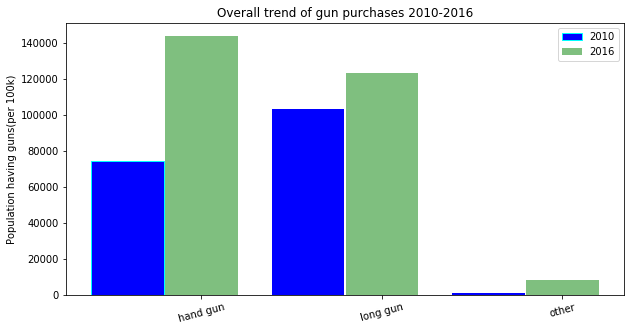

In [212]:
#Visualization to plot the overall trend
plt.figure(figsize=(10,5))
plt.bar(pos1,data_2010,color='blue',edgecolor='cyan',label='2010')
plt.bar(pos2,data_2016,color='green',alpha=0.5,label='2016')
plt.legend()
plt.xticks([r + barwidth for r in range(1,6,2)],['hand gun','long gun','other'],rotation=15)
plt.ylabel('Population having guns(per 100k)')
plt.title('Overall trend of gun purchases 2010-2016')
plt.savefig('Overall gun trend.png',dpi=200)

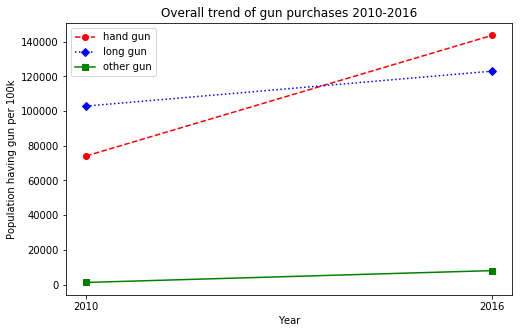

In [213]:
#Visualization of gun purchase trends using line graph
plt.figure(figsize=(8,5))
plt.plot(['2010','2016'],[handgun_count_10,handgun_count_16],color='red',linestyle='dashed',marker='o',label='hand gun')
plt.plot([longgun_count_10,longgun_count_16],color='blue',linestyle='dotted',marker='D',label='long gun')
plt.plot([other_count_10,other_count_16],color='green',linestyle='solid',marker='s',label='other gun')
plt.title('Overall trend of gun purchases 2010-2016')
plt.xlabel('Year')
plt.ylabel('Population having gun per 100k')
plt.legend()
plt.savefig('Overall trend of gun purchases.png',dpi=200)

<a id='conclusions'></a>
## Conclusions

Conclusion is brought about by analyzing datasets containing 12486 rows and 27 columns in gun dataset and 65 rows and 52 columns in U.S. Census data. Gun data contains data from 1998 to 2017 splitted month-wise and census data contains values from 2010-2016. 

The number of samples provided represent the actual population so the analysis made is pretty  accurate. 

Shortcomings: The gun dataset actually misses most of the values till the year 2014.Only limited attributes has data for all the time period. So, except hand gun, long gun and other types of guns, the dataset lack values for all the other attributes making it difficult to analyze the trend for other attributes in the dataset. Yet it will not affect the analysis of other attributes in the dataset(like hand gun analysis, long gun analysis and other types of guns analysis).


From the above analysis, it is evident that ,
1. Most hand guns are owned by people in New Hampshire in the year 2016.
2. Most long guns are owned by people in South Dakota in the year 2016.
3. Other type of guns are mostly owned by people in South California in the year 2016.
4. Population having guns has increased from 2010 to 2016.
5. More people have hand guns when compared to other type of guns
6. Other type of guns are used only by few people.



In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0